# Introduction to Bamboo

Bamboo is Python package for modelling the cooling systems of liquid rocket engines. 

Most of its functionality revolves around the bamboo.main.Engine class. Full documentation is available at https://cuspaceflight.github.io/bamboo/.

## Simple Engine Example

We will start with an example of creating an Engine. 

To create an Engine object, we need to first create three sub-objects: 
- A <b>PerfectGas</b> object
- A <b>ChamberConditions</b> object
- A <b>Nozzle</b> object

But we begin by importing bamboo and specifying the operating conditions for our engine.

In [1]:
import bamboo as bam

'''Chosen operating points'''
mdot = 4.757        #Mass flow rate (kg/s)
p_amb = 1.01325e5   #Ambient pressure (Pa). 
pc = 10e5           #Chamber pressure (Pa)

'''From ProPEP 3 I got the following data on my exhaust gas'''
gamma = 1.264               #Ratio of specific heats cp/cv (used to specify our PerfectGas object)
molecular_weight = 21.627   #Molecular weight of the exhaust gas (kg/kmol) (used to specify our PerfectGas object)
Tc = 2458.89                #Chamber temperature (K) - obtained from ProPEP 3

### Specifying the PerfectGas and ChamberConditions

To define our perfect gas, we must specify two of its properties. See the documentation available options. As of writing, the available keyword arguments are 'gamma', 'molecular_weight' and 'cp'.

To define our ChamberConditions, we need the mass flow rate 'mdot', the chamber stagnation pressure 'p0', and the chamber stagnation temperature 'T0'.

In [2]:
perfect_gas = bam.PerfectGas(gamma = gamma, molecular_weight = molecular_weight)
chamber = bam.ChamberConditions(pc, Tc, mdot)

### Specifying the Nozzle

To define the Nozzle, we have two options. 
- Directly specify the throat and exit area (At and Ae respectively)
- Use the Nozzle.from_engine_components() method, which will select At to just choke the nozzle, and Ae to match a given exit pressure, 'p_amb'. 

(The 'WARNING: Area ratio is outside the range of the Rao [...] data' message is not problematic. By default the program will try to create a Rao bell nozzle, but the data for such nozzles is unavailable for very large or small area ratios. In either of these cases, <b> the software simply uses an exit angle of 15 degrees</b>).

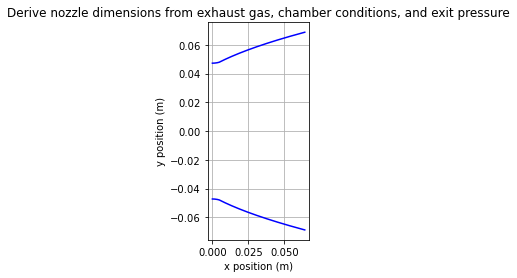

Rao type nozzle (length fraction = 0.8). 
Length = 0.06421000613621163 m 
Throat area = 0.007000596639641742 m^2 
Exit area = 0.014832425713316083 m^2 
Area ratio = 2.1187373700872354 
Rao inflection angle = 14.999999999999998 deg 
Rao exit angle = 14.999 deg


In [6]:
import matplotlib.pyplot as plt

#Directly specifying At and Ae

'''
chosen_At = 0.007
chosen_Ae = 0.05

nozzle = bam.Nozzle(chosen_At, chosen_Ae, type = "rao", length_fraction = 0.8)
nozzle.plot_nozzle()
plt.title("Directly specified throat and exit area")
plt.show()
'''

#Deriving Ae and At from the operating conditions and exit pressure
nozzle = bam.Nozzle.from_engine_components(perfect_gas, chamber, p_amb, type = "rao", length_fraction = 0.8)
nozzle.plot_nozzle()
plt.title("Derive nozzle dimensions from exhaust gas, chamber conditions, and exit pressure")
plt.show()

#Print the nozzle parameters
print(nozzle)

### Creating the Engine object

We can now create the Engine object with relative ease:

In [7]:
engine = bam.Engine(perfect_gas, chamber, nozzle)

We can now get some properties of the Engine:

(note that almost all calculations made with the engine assume isentropic, 1-dimensional, perfect gas relations. Hence, the results may be different to those calculated using reacting flow e.g. from NASA's CEA, or ProPEP).

In [9]:
print(f"Sea level thrust = {engine.thrust(1e5)/1000} kN")
print(f"Sea level Isp = {engine.isp(1e5)} s")

print(f"\nThroat pressure = {engine.p(0)/1e5} bar")
print(f"Throat temperature = {engine.T(0) - 273.15} °C")
print(f"Throat Mach number = {engine.M(0)}")

print(f"\nExit pressure = {engine.p(nozzle.length)/1e5} bar")
print(f"Exit temperature = {engine.T(nozzle.length) - 273.15} °C")
print(f"Exit Mach number = {engine.M(nozzle.length)}")

Sea level thrust = 8.843291394292795 kN
Sea level Isp = 189.56585265605534 s

Throat pressure = 5.523188113751419 bar
Throat temperature = 1899.0143109540631 °C
Throat Mach number = 1.0

Exit pressure = 1.013249999999998 bar
Exit temperature = 1251.1565550494934 °C
Exit Mach number = 2.1551917585508087


## Running a cooling system analysis

(to be added)